In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv('Spam_SMS.csv')

In [3]:
df.sample(5)

,Class,Message
1383,ham,Its ok my arm is feeling weak cuz i got a shot...
230,ham,Dear good morning now only i am up
5010,ham,My mobile number.pls sms ur mail id.convey reg...
178,ham,Turns out my friends are staying for the whole...
3953,ham,Me hungry buy some food good lei... But mum n ...


In [4]:
df.shape

(5574, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.sample(5)

,Class,Message
853,ham,No da if you run that it activate the full ver...
1872,ham,Dont know supports ass and srt i thnk. I think...
1035,ham,ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...
1961,spam,Guess what! Somebody you know secretly fancies...
4864,spam,Bored housewives! Chat n date now! 0871750.77....


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['Class'] = encoder.fit_transform(df['Class'])


In [9]:
df.head()

,Class,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

Class      0
Message    0
dtype: int64

In [11]:
df.duplicated().sum()

415

In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5159, 2)

In [15]:
df.head

<bound method NDFrame.head of       Class                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5569      1  This is the 2nd time we have tried 2 contact u...
5570      0               Will ü b going to esplanade fr home?
5571      0  Pity, * was in mood for that. So...any other s...
5572      0  The guy did some bitching but I acted like i'd...
5573      0                         Rofl. Its true to its name

[5159 rows x 2 columns]>

In [16]:
df['Class'].value_counts()

Class
0    4518
1     641
Name: count, dtype: int64

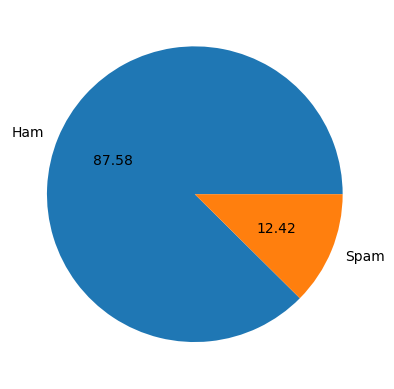

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['Class'].value_counts(), labels=['Ham','Spam'], autopct="%0.2f")
plt.show()

In [18]:
import nltk

In [19]:
!pip install nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sriva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['Message'].apply(len)

In [22]:
df.head()

,Class,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#number of words
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,Class,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
#number of sentences
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,Class,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5159.000000,5159.000000,5159.000000
mean,79.130064,18.596821,1.970731
std,58.289063,13.406675,1.455997
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#ham
df[df['Class'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,70.861000,17.302125,1.827579
std,56.584513,13.592056,1.394245
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#Spam
df[df['Class'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.413417,27.722309,2.979719
std,29.998996,7.032577,1.483627
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

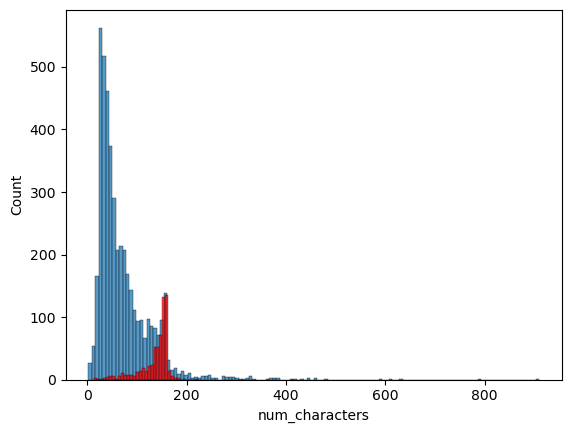

In [31]:
sns.histplot(df[df['Class'] == 0]['num_characters'])
sns.histplot(df[df['Class'] == 1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

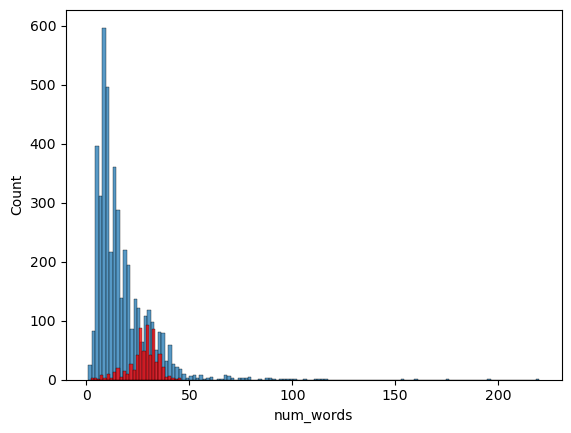

In [32]:
sns.histplot(df[df['Class'] == 0]['num_words'])
sns.histplot(df[df['Class'] == 1]['num_words'],color = 'red')

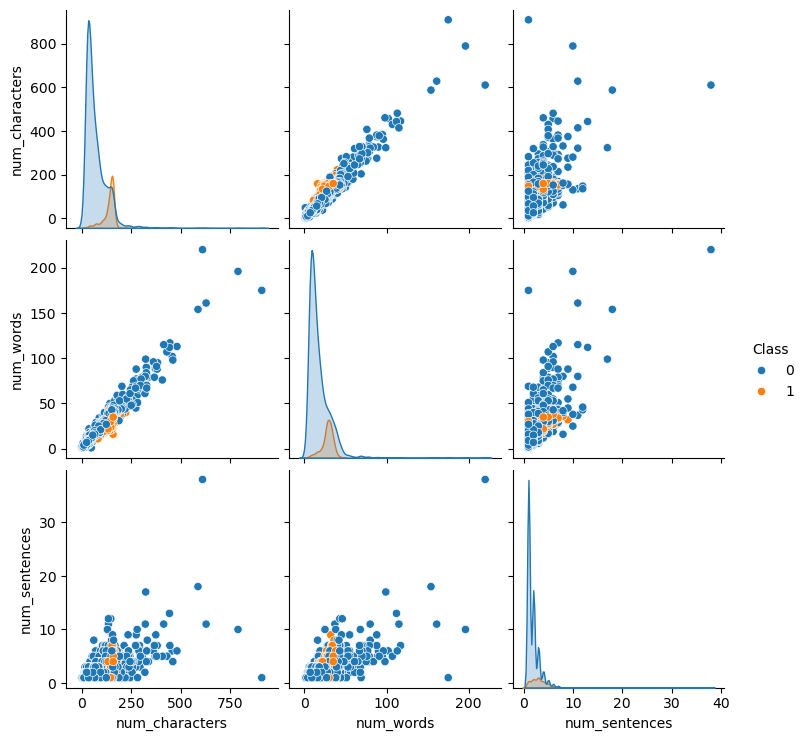

In [33]:
sns.pairplot(df,hue = 'Class')

In [34]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Now calculate the correlation on the numeric DataFrame
numeric_df.corr()



,Class,num_characters,num_words,num_sentences
Class,1.000000,0.376665,0.256409,0.261050
num_characters,0.376665,1.000000,0.966000,0.623335
num_words,0.256409,0.966000,1.000000,0.679619
num_sentences,0.261050,0.623335,0.679619,1.000000


<Axes: >

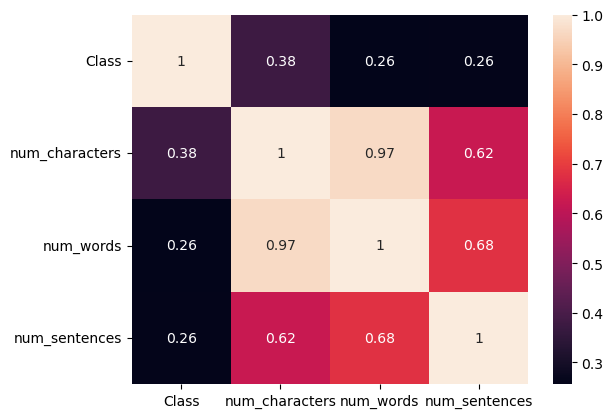

In [35]:
sns.heatmap(numeric_df.corr(),annot = True)

In [36]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [37]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [38]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sriva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sriva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sriva\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
def transform_Message(Message):
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)

    y = []
    for i in Message:
        if i.isalnum():
            y.append(i)

    Message = y[:]
    y.clear()

    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    Message = y[:]
    y.clear()
   
    for i in Message:
        y.append(ps.stem(i))

    
    return " ".join(y)

In [40]:
transform_Message('HI HOW ARE YOU AVIRAL i loving watching anime and YT?')

'hi avir love watch anim yt'

In [41]:
df['Message'][2000]

"LMAO where's your fish memory when I need it?"

In [42]:
df['transformed_Message'] = df['Message'].apply(transform_Message)

In [43]:
df.head()

,Class,Message,num_characters,num_words,num_sentences,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [46]:
df.head()

,Class,Message,num_characters,num_words,num_sentences,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
spam_wc = wc.generate(df[df['Class']== 1]['transformed_Message'].str.cat(sep=" "))

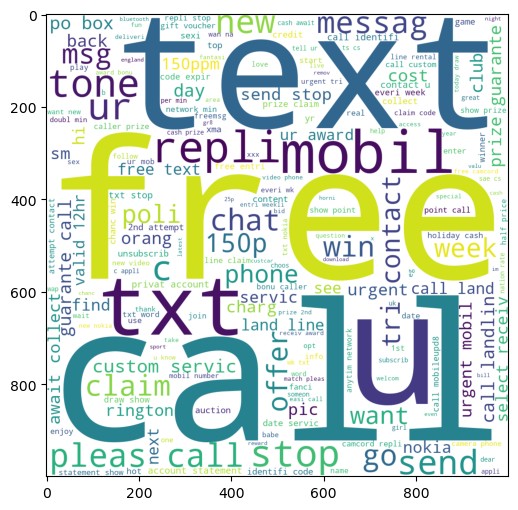

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['Class']== 0]['transformed_Message'].str.cat(sep=" "))

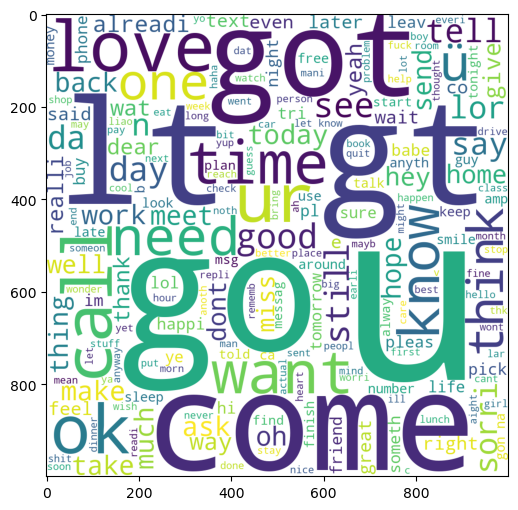

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
df.head()

,Class,Message,num_characters,num_words,num_sentences,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
spam_corpus = []
for msg in df[df['Class'] == 1]['transformed_Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)

9792

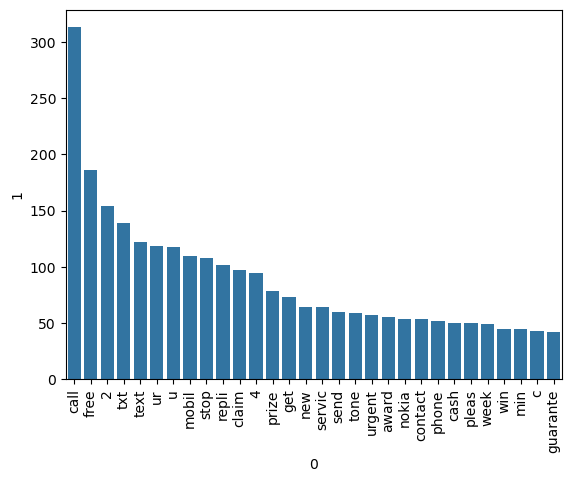

In [54]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation= 'vertical')
plt.show()

In [55]:
#MODEL BUILDING

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [57]:
X = tfidf.fit_transform(df['transformed_Message']).toarray()

In [58]:
X.shape

(5159, 6789)

In [59]:
y = df['Class'].values

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [63]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [64]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8682170542635659
[[789 120]
 [ 16 107]]
0.4713656387665198


In [65]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9622093023255814
[[909   0]
 [ 39  84]]
1.0


In [66]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9699612403100775
[[904   5]
 [ 26  97]]
0.9509803921568627


In [67]:
# tfidf --> MNB

In [68]:
pip install xgboost

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [71]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [72]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [73]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9718992248062015, 0.9519230769230769)

In [74]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9718992248062015
Precision -  0.9519230769230769
For  KN
Accuracy -  0.9098837209302325
Precision -  1.0
For  NB
Accuracy -  0.9622093023255814
Precision -  1.0
For  DT
Accuracy -  0.937015503875969
Precision -  0.7959183673469388
For  LR
Accuracy -  0.9583333333333334
Precision -  0.9166666666666666
For  RF
Accuracy -  0.9641472868217055
Precision -  1.0


C:\Users\sriva\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9641472868217055
Precision -  0.9134615384615384
For  BgC
Accuracy -  0.9602713178294574
Precision -  0.8727272727272727
For  ETC
Accuracy -  0.9728682170542635
Precision -  1.0
For  GBDT
Accuracy -  0.9563953488372093
Precision -  0.9431818181818182
For  xgb
Accuracy -  0.9670542635658915
Precision -  0.9320388349514563


In [75]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [76]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.909884,1.000000
2,NB,0.962209,1.000000
5,RF,0.964147,1.000000
8,ETC,0.972868,1.000000
0,SVC,0.971899,0.951923
9,GBDT,0.956395,0.943182
10,xgb,0.967054,0.932039
4,LR,0.958333,0.916667
6,AdaBoost,0.964147,0.913462
7,BgC,0.960271,0.872727


In [77]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [78]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.909884
1,NB,Accuracy,0.962209
2,RF,Accuracy,0.964147
3,ETC,Accuracy,0.972868
4,SVC,Accuracy,0.971899
5,GBDT,Accuracy,0.956395
6,xgb,Accuracy,0.967054
7,LR,Accuracy,0.958333
8,AdaBoost,Accuracy,0.964147
9,BgC,Accuracy,0.960271


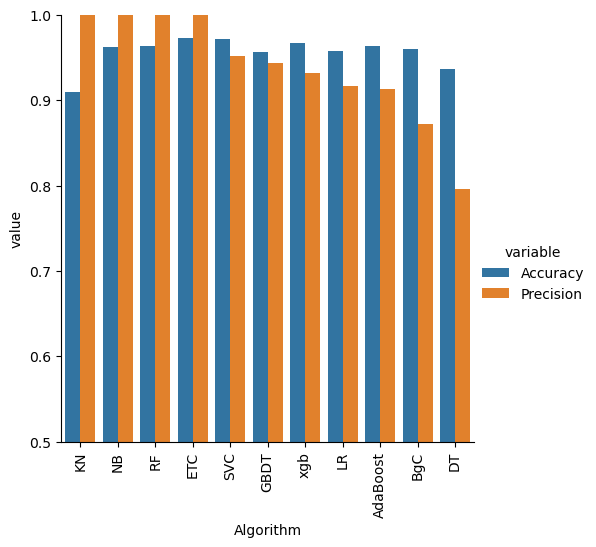

In [79]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [80]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [81]:

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [83]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [84]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [86]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.909884,1.000000,0.909884,1.000000,0.909884,1.000000,0.909884,1.000000
1,NB,0.962209,1.000000,0.962209,1.000000,0.962209,1.000000,0.962209,1.000000
2,RF,0.964147,1.000000,0.964147,1.000000,0.964147,1.000000,0.964147,1.000000
3,ETC,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000
4,SVC,0.971899,0.951923,0.971899,0.951923,0.971899,0.951923,0.971899,0.951923
5,GBDT,0.956395,0.943182,0.956395,0.943182,0.956395,0.943182,0.956395,0.943182
6,xgb,0.967054,0.932039,0.967054,0.932039,0.967054,0.932039,0.967054,0.932039
7,LR,0.958333,0.916667,0.958333,0.916667,0.958333,0.916667,0.958333,0.916667
8,AdaBoost,0.964147,0.913462,0.964147,0.913462,0.964147,0.913462,0.964147,0.913462
9,BgC,0.960271,0.872727,0.960271,0.872727,0.960271,0.872727,0.960271,0.872727


In [87]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [88]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [89]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [90]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748062015503876
Precision 0.98989898989899


In [91]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [92]:
from sklearn.ensemble import StackingClassifier

In [93]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [192]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835271317829457
Precision 0.9568965517241379


In [193]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [194]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))